In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [9]:
iris = load_iris()
x = iris.data[iris.target != 0]
y = iris.target[iris.target != 0] - 1
y = y.reshape(100, 1)

In [10]:
x = np.hstack((x, np.ones((100, 1))))

In [11]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
x_n = pca_model.fit_transform(x)

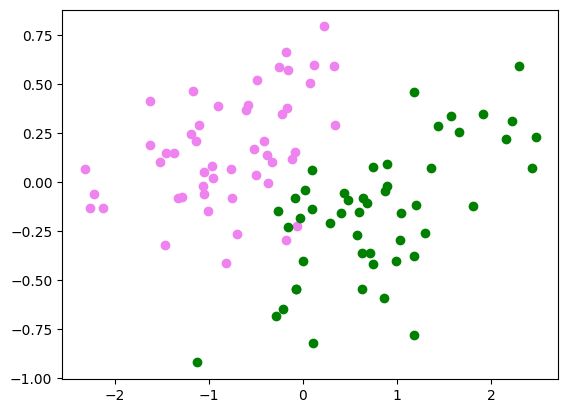

In [12]:
plt.scatter(x_n[y[:,0] == 0, 0], x_n[y[:,0] == 0, 1], c='violet')
plt.scatter(x_n[y[:,0] == 1, 0], x_n[y[:,0] == 1, 1], c='green')
plt.show()

In [16]:
w = np.array((0.2, 0.2, 0.2, 0.2, 0.2)).reshape(5, 1)
b = 0
learning_rate = 0.5 / x.shape[0]
n_iterations = 300 * x.shape[0]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, w):
    return sigmoid(np.dot(x, w))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_accuracy(y, y_pred):
    predictions = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(predictions == y.reshape(100, 1))
    return accuracy

for iteration in range(n_iterations):
    idx = np.random.randint(len(x))
    X_i = x[idx:idx+1]
    y_i = y[idx:idx+1]

    y_pred = predict(X_i, w)
    error = y_i - y_pred

    gradient_w = X_i * error
    # gradient_b = error

    w += (learning_rate * gradient_w).T
    # b -= learning_rate * gradient_b

    if iteration % 1000 == 0 or iteration >= n_iterations-3:
        y_pred_all = predict(x, w)
        loss = compute_loss(y, y_pred_all)
        accuracy = compute_accuracy(y, y_pred_all)
        print(f"Iteration {iteration}, Loss: {loss}, Accuracy: {accuracy}")


Iteration 0, Loss: 1.5697021510522382, Accuracy: 0.5
Iteration 1000, Loss: 0.5391912185559329, Accuracy: 0.78
Iteration 2000, Loss: 0.43747551989818667, Accuracy: 0.96
Iteration 3000, Loss: 0.40251316309585056, Accuracy: 0.88
Iteration 4000, Loss: 0.3792293669166572, Accuracy: 0.87
Iteration 5000, Loss: 0.31804988738312584, Accuracy: 0.9
Iteration 6000, Loss: 0.2825908957755958, Accuracy: 0.94
Iteration 7000, Loss: 0.2592522020729072, Accuracy: 0.98
Iteration 8000, Loss: 0.2429132377193574, Accuracy: 0.97
Iteration 9000, Loss: 0.23034327235050536, Accuracy: 0.96
Iteration 10000, Loss: 0.22986943027521856, Accuracy: 0.94
Iteration 11000, Loss: 0.21449007159197112, Accuracy: 0.96
Iteration 12000, Loss: 0.20333454418256403, Accuracy: 0.97
Iteration 13000, Loss: 0.19747554151943067, Accuracy: 0.97
Iteration 14000, Loss: 0.1992640668698125, Accuracy: 0.96
Iteration 15000, Loss: 0.18926669056643178, Accuracy: 0.97
Iteration 16000, Loss: 0.19324410509660656, Accuracy: 0.95
Iteration 17000, Lo

In [17]:
w

array([[-2.78427453],
       [-2.46832928],
       [ 3.97855447],
       [ 4.17594331],
       [-1.75871829]])

In [18]:
df = pd.DataFrame(np.hstack((x, y.reshape(-1, 1), predict(x, w).reshape(-1, 1))))
df.head(), df.tail()

(     0    1    2    3    4    5         6
 0  7.0  3.2  4.7  1.4  1.0  0.0  0.009934
 1  6.4  3.2  4.5  1.5  1.0  0.0  0.035253
 2  6.9  3.1  4.9  1.5  1.0  0.0  0.054003
 3  5.5  2.3  4.0  1.3  1.0  0.0  0.196796
 4  6.5  2.8  4.6  1.5  1.0  0.0  0.099521,
       0    1    2    3    4    5         6
 95  6.7  3.0  5.2  2.3  1.0  1.0  0.922357
 96  6.3  2.5  5.0  1.9  1.0  1.0  0.913457
 97  6.5  3.0  5.2  2.0  1.0  1.0  0.855558
 98  6.2  3.4  5.4  2.3  1.0  1.0  0.975285
 99  5.9  3.0  5.1  1.8  1.0  1.0  0.901713)

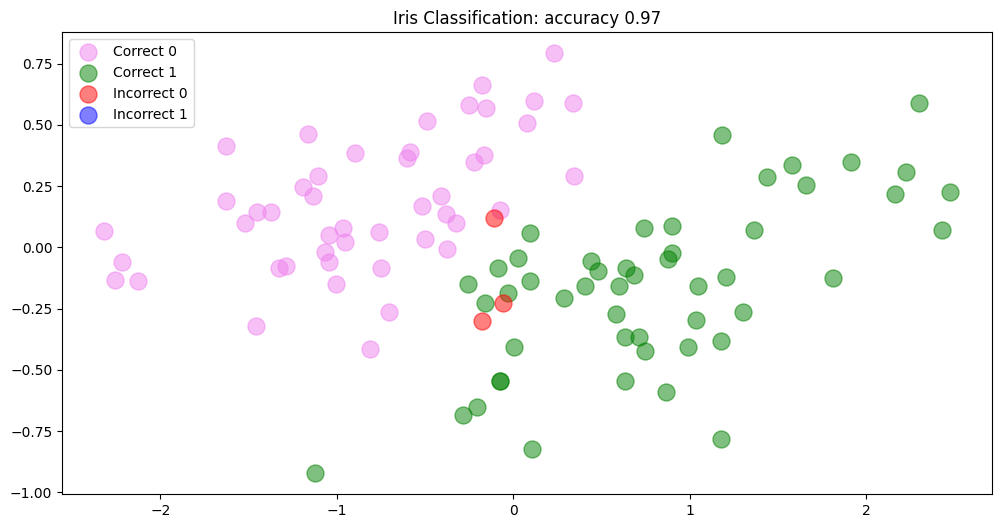

In [19]:
pred_all = (predict(x, w) >= 0.5).astype(int)
accuracy = compute_accuracy(y, y_pred_all)

plt.figure(figsize=(12, 6))

plt.scatter(x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 0), 0],
            x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 0), 1],
            c='violet',
            s=150,
            alpha=0.5,
            label='Correct 0')
plt.scatter(x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 1), 0],
            x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 1), 1],
            c='green',
            s=150,
            alpha=0.5,
            label='Correct 1')
plt.scatter(x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 0), 0],
            x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 0), 1],
            c='red',
            s=150,
            alpha=0.5,
            label='Incorrect 0')
plt.scatter(x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 1), 0],
            x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 1), 1],
            c='blue',
            s=150,
            alpha=0.5,
            label='Incorrect 1')

plt.title(F'Iris Classification: accuracy {accuracy}')
plt.legend()
plt.show()
